In [3]:
import numpy as np
import scipy as sci
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# 2.

In [4]:
def Diff_eigenv(step=None,alpha=None):  #assume, l=1
    A=np.zeros([step-1,step-1])
    a=alpha(1/step)
    b=alpha(1-(1/step))
    for i in np.arange(step-1):
        c=alpha((i+1)/step)
        if i == 0:
            A[i][0:2]=np.dot([1,-1],a)
        elif i == step-2:
            A[i][:step-4:-1]=np.dot([1,-1],b)
        else:
            A[i][i-1:i+2]=np.dot([-1,2,-1],c)
    A=A*(step**2)
    eigen=np.linalg.eig(A)
    return(A,eigen)

In [5]:
isort=np.argsort(Diff_eigenv(step=102, alpha=lambda x: 1)[1][0])
y=Diff_eigenv(step=102, alpha=lambda x: 1)[1][0][isort]
y*(1/(np.pi)**2)

array([  1.29839431e-12,   1.01981778e+00,   4.07828452e+00,
         9.17244134e+00,   1.62973600e+01,   2.54461476e+01,
         3.66099532e+01,   4.97779766e+01,   6.49374786e+01,
         8.20737934e+01,   1.01170343e+02,   1.22208652e+02,
         1.45168367e+02,   1.70027277e+02,   1.96761333e+02,
         2.25344670e+02,   2.55749636e+02,   2.87946816e+02,
         3.21905062e+02,   3.57591522e+02,   3.94971670e+02,
         4.34009344e+02,   4.74666777e+02,   5.16904637e+02,
         5.60682061e+02,   6.05956696e+02,   6.52684743e+02,
         7.00820995e+02,   7.50318884e+02,   8.01130523e+02,
         8.53206756e+02,   9.06497202e+02,   9.60950306e+02,
         1.01651339e+03,   1.07313269e+03,   1.13075345e+03,
         1.18931991e+03,   1.24877542e+03,   1.30906245e+03,
         1.37012268e+03,   1.43189705e+03,   1.49432578e+03,
         1.55734848e+03,   1.62090419e+03,   1.68493141e+03,
         1.74936820e+03,   1.81415223e+03,   1.87922082e+03,
         1.94451102e+03,

The eigenvalues are increasing in $n^2$.

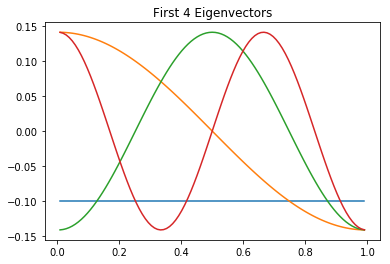

Text(0.5,1,'First 4 Eigenvectors')

In [7]:
b=Diff_eigenv(step=102, alpha=lambda x: 1)[1][1][:,isort]
for i in np.arange(4):
    plt.plot(np.linspace(0,1,103)[1:102], b[:,i])
plt.show()
plt.title("First 4 Eigenvectors")

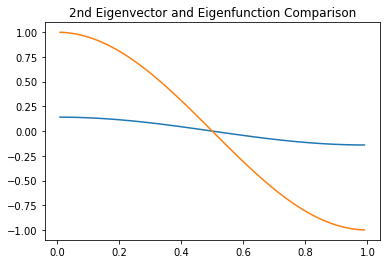

array([ 7.10382392,  7.10058407,  7.09746907,  7.09447328,  7.09159148,
        7.08881881,  7.08615075,  7.08358312,  7.081112  ,  7.07873375])

In [130]:
sample=[]
for i in np.linspace(1/102,1-1/102,101):
    sample=np.append(sample,[np.cos(np.pi*i)])
x=np.linspace(1/102,1-1/102,101)
plt.plot(x,b[:,1])
plt.plot(x,sample)
plt.show()
plt.title("2nd Eigenvector and Eigenfunction Comparison")
(sample/b[:,1])[:10]

Since the returned eigenvector have magnitude of one, we see that the ratio between the analytic solution functions are about 7 times larger.

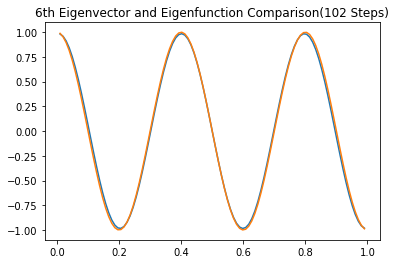

array([-0.00610565,  0.00541176,  0.0163506 ,  0.02647395,  0.03557459,
        0.04347902,  0.05005063,  0.05519167,  0.05884421,  0.06098993,
        0.06164892,  0.06087754,  0.05876526,  0.05543091,  0.05101815,
        0.04569054,  0.03962622,  0.03301244,  0.0260401 ,  0.01889835])

In [13]:
sample2=[]
for i in np.linspace(1/102,1-1/102,101):
    sample2=np.append(sample2,[np.cos(5*np.pi*i)])
x=np.linspace(1/102,1-1/102,101)
plt.plot(x,7*b[:,5])
plt.plot(x,sample2)
plt.show()
plt.title("6th Eigenvector and Eigenfunction Comparison(102 Steps)")
(7*b[:,5]-sample2)[:20] 

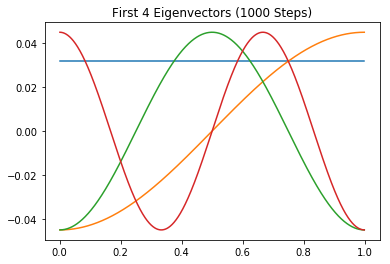

In [18]:
b2=Diff_eigenv(step=1000, alpha=lambda x: 1)[1][1][:,np.argsort(Diff_eigenv(step=1000, alpha=lambda x: 1)[1][0])]
for i in np.arange(4):
    plt.plot(np.linspace(0,1,1001)[1:1000], b2[:, i])
plt.title("First 4 Eigenvectors (1000 Steps)")
plt.show()

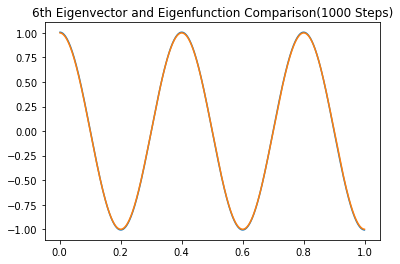

array([-0.00682634, -0.00694752, -0.0070665 , -0.00718323, -0.0072977 ,
       -0.00740986, -0.00751971, -0.0076272 , -0.00773232, -0.00783503,
       -0.00793532, -0.00803317, -0.00812854, -0.00822141, -0.00831178,
       -0.0083996 , -0.00848488, -0.00856757, -0.00864768, -0.00872517])

In [20]:
sample3=[]
for i in np.linspace(1/1000,1-1/1000,999):
    sample3=np.append(sample3,[np.cos(5*np.pi*i)])
x=np.linspace(1/1000,1-1/1000,999)
plt.plot(x,-22.5*b2[:,5])
plt.plot(x,sample3)
plt.show()
plt.title("6th Eigenvector and Eigenfunction Comparison(1000 Steps)")
(22.5*b2[:,5]+sample3)[:20] 

By increase the step size by 10 times, seems to decrease the error between eigenvector and eigenfuntion also by factor of 10.

## Gaussian Initial Condition Using Analytic Solution

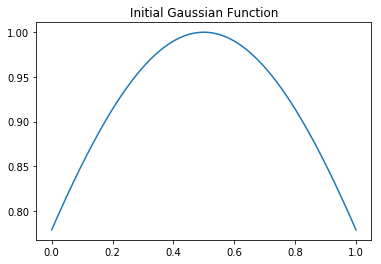

Text(0.5,1,'Initial Gaussian Function')

In [11]:
u0 = lambda x: np.exp(-(((x-0.5))**2))
x = np.linspace(0,1,100)
y  =u0(x)
plt.plot(x,y)
plt.show()
plt.title("Initial Gaussian Function")

In [13]:
Ns=150

def Coeff(steps=None): #assume alpha=1, l=1
    coef=np.zeros(steps-1)
    for i in np.arange(steps-1):
        eigenf=lambda x:np.cos(x*i*np.pi)*np.exp(-(((x-0.5))**2))
        coef[i]=2*integrate.quad(eigenf,0,1)[0]
    coef[0]=coef[0]/2
    return(coef)
A=Coeff(Ns)
x_n=np.linspace(1/Ns, 1-1/Ns, Ns-1)
Sol_Matrix=np.zeros([Ns-1,Ns-1])
for i in np.arange(Ns-1):
    for j in np.arange(Ns-1):
        if j==0:
            Sol_Matrix[i,j]=A[0]
        else:
            Sol_Matrix[i,j]=np.cos(x_n[i]*j*np.pi)*A[j]
def T_ma(t=None, N=None):
    B=1
    for i in np.arange(1,N-1):
        B=np.append(B,np.exp(-(i**2)*(np.pi**2)*t))
    return(B)

In [222]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0.755, 1))
plt.grid(True)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = x_n
    y=np.dot(Sol_Matrix,T_ma(i/10000,Ns)) #slow down t by 10000
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=40,blit=True)
HTML(anim.to_html5_video())

## Using eigenvectors

In [15]:
step_= 120

def heat_sol(ini_f=None, al=None, N=None):
    sorted_v=Diff_eigenv(N, al)[1][1][:,np.argsort(Diff_eigenv(N, al)[1][0])]
    ini_array=ini_f(np.linspace(1/N,1-1/N,N-1))
    coeff=np.dot(np.linalg.inv(sorted_v),ini_array)
    Sol_Ma=np.zeros([N-1,N-1])
    for i in np.arange(N-1):
        for j in np.arange(N-1):
                Sol_Ma[i,j]= sorted_v[:,j][i]*coeff[j]
    return (Sol_Ma)

In [223]:
x2=heat_sol(ini_f=u0, al=lambda x:1, N=120)
def animate2(i):
    x = np.linspace(1/120,1-1/120,119)
    y=np.dot(x2,T_ma(i/10000,120)) #slow down t by 10000
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate2, init_func=init,
                               frames=400, interval=40,blit=True)

HTML(anim.to_html5_video())

# 3

## Diffusivity Proportional to Distance

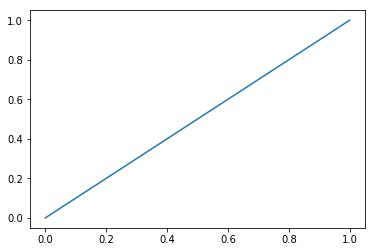

In [238]:
al=lambda x:x
plt.plot(np.linspace(0,1,100),al(np.linspace(0,1,100)))
plt.show()

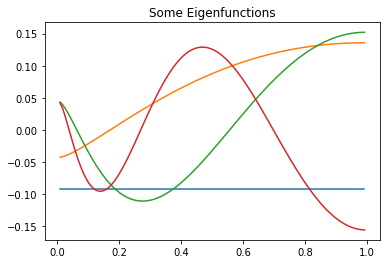

Text(0.5,1,'Some Eigenfunctions')

In [254]:
ev=Diff_eigenv(step=120, alpha=al)[1][1][:,np.argsort(Diff_eigenv(step=120, alpha=al)[1][0])]
for i in np.arange(4):
    plt.plot(np.linspace(1/120,1-1/120,119), ev[:,i])
plt.show()
plt.title("Some Eigenfunctions")

In [240]:
fig2 = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0.7, 1.05))
plt.grid(True)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

x2=heat_sol(ini_f=u0, al=lambda x:x, N=120)
def animate2(i):
    x = np.linspace(1/120,1-1/120,119)
    y=np.dot(x2,T_ma(i/10000,120),np.exp(-al(x))) #slow down t by 10000
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig2, animate2, init_func=init,
                               frames=400, interval=40,blit=True)
HTML(anim.to_html5_video())

## Low Diffusivity In Some Sections

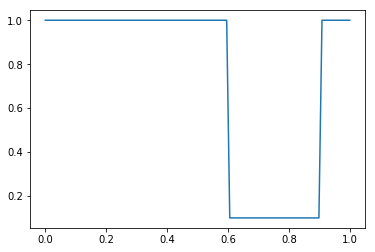

In [31]:
def f3(z=None):
    if np.size(z)==1:
        if (z<0.9 and z>0.6):
            z1=0.1
        else:
            z1=1
    else:
        z1=np.zeros(np.size(z))
        for i in np.arange(np.size(z)):
            if (z[i]<0.9 and z[i]>0.6):
                z1[i]=0.1
            else:
                z1[i]=1
    return(z1)
plt.plot(np.linspace(0,1,100),f3(np.linspace(0,1,100)))
plt.show()

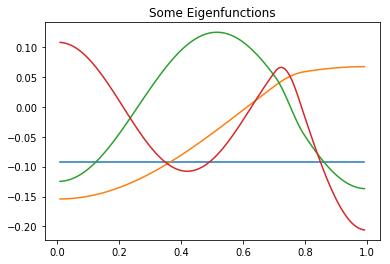

Text(0.5,1,'Some Eigenfunctions')

In [19]:
ev=Diff_eigenv(step=120, alpha=f3)[1][1][:,np.argsort(Diff_eigenv(step=120, alpha=f3)[1][0])]
for i in np.arange(4):
    plt.plot(np.linspace(1/120,1-1/120,119), ev[:,i])
plt.show()
plt.title("Some Eigenfunctions")

In [40]:
x2=heat_sol(ini_f=u0, al=f3, N=120)

fig3 = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0.7, 1.05))
plt.grid(True)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate3(i):
    x = np.linspace(1/120,1-1/120,119)
    y=np.dot(x2,T_ma(i/10000,120),np.exp(-f3(x))) #slow down t by 10000
    line.set_data(x, y)
    return (line,)

anim3 = animation.FuncAnimation(fig3, animate3, init_func=init,
                               frames=400, interval=40,blit=True)
HTML(anim3.to_html5_video())

## Some Other Pattern

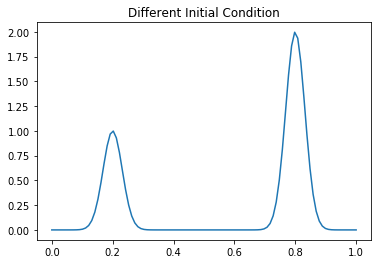

Text(0.5,1,'Different Initial Condition')

In [103]:
u1 = lambda x: np.exp(-(((x-0.2))**2)*500)+2*np.exp(-(((x-0.8))**2)*500)
x = np.linspace(0,1,100)
y  =u1(x)
plt.plot(x,y)
plt.show()
plt.title("Different Initial Condition")

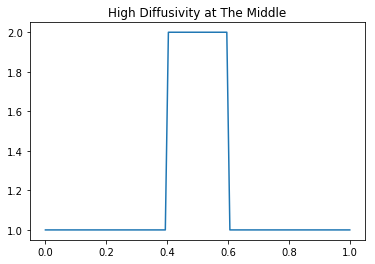

In [118]:
def f4(z=None):
    if np.size(z)==1:
        if (z<0.6 and z>0.4):
            z1=2
        else:
            z1=1
    else:
        z1=np.zeros(np.size(z))
        for i in np.arange(np.size(z)):
            if (z[i]<0.6 and z[i]>0.4):
                z1[i]=2
            else:
                z1[i]=1
    return(z1)
plt.title("High Diffusivity at The Middle")
plt.plot(np.linspace(0,1,100),f4(np.linspace(0,1,100)))
plt.show()

In [119]:
x2=heat_sol(ini_f=u1, al=f4, N=120)

fig4 = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2))
plt.grid(True)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate4(i):
    x = np.linspace(1/120,1-1/120,119)
    y=np.dot(x2,T_ma(i/10000,120),np.exp(-f4(x))) #slow down t by 10000
    line.set_data(x, y)
    return (line,)

anim3 = animation.FuncAnimation(fig4, animate4, init_func=init,
                               frames=400, interval=40,blit=True)
HTML(anim3.to_html5_video())